# **Практика 6: Атака по переносу (Transfer Attack) на модели ИИ**

Выполнил студент 2 курса группы: **ББМО-02-23**

ФИО: **Курченко Иван Дмитриевич**

# **Цель задания:**
Изучить концепцию атаки по переносу, где противоречивые примеры, созданные для одной модели, используются для атаки на другую модель. Это задание требует создания нескольких моделей, генерации противоречивых примеров для одной модели и проверки их на другой модели.

##**Шаги выполнения:**

### **Шаг 1: Загружаем нужные для работы библиотеки**

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

### **Шаг 2: Загрузка датасета MNIST и нормализация данных**

In [23]:
# Импортируем необходимые библиотеки
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загружаем датасет MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Проверяем размеры загруженных данных
print(f'Размер обучающего набора до нормализации: {train_images.shape} изображений')
print(f'Размер тестового набора до нормализации: {test_images.shape} изображений')

# Нормализуем данные, приводя значения пикселей к диапазону [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Преобразуем метки в формат one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Выводим информацию о размере наборов данных после нормализации
print(f'Размер обучающего набора после нормализации: {train_images.shape[0]} изображений')
print(f'Размер тестового набора после нормализации: {test_images.shape[0]} изображений')

Размер обучающего набора до нормализации: (60000, 28, 28) изображений
Размер тестового набора до нормализации: (10000, 28, 28) изображений
Размер обучающего набора после нормализации: 60000 изображений
Размер тестового набора после нормализации: 10000 изображений


### **Шаг 3: Создаем две модели на датасете MNIST**
1. Простую полносвязную сеть
2. Свёрточную нейронную сеть (**CNN**)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Проверяем наличие данных
if train_images is None or test_images is None:
    raise ValueError("Данные не загружены. Пожалуйста, загрузите данные перед обучением модели.")

# Создаем простую полносвязную модель
model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразуем 2D-изображения в 1D
    Dense(128, activation='relu'),   # Скрытый слой с 128 нейронами и активацией ReLU
    Dense(10, activation='softmax')   # Выходной слой с 10 нейронами для классификации (по количеству классов)
])

# Компилируем модель
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Обучаем модель на тренировочных данных
model1.fit(train_images, train_labels, epochs=5)

# Проверяем точность модели на тестовых данных
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc:.4f}')

# Сохраняем модель в файл для дальнейшего использования
model1.save('mnist_model_fc.h5')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8715 - loss: 0.4413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1202
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9760 - loss: 0.0784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9838 - loss: 0.0554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9871 - loss: 0.0416
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9736 - loss: 0.0764


Test accuracy on clean images: 0.9787


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Проверяем наличие данных
if train_images is None or test_images is None:
    raise ValueError("Данные не загружены. Пожалуйста, загрузите данные перед обучением модели.")

# Предобработка данных: добавляем размерность канала для изображений (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Создаем модель свёрточной нейронной сети
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Свёрточный слой с 32 фильтрами
    MaxPooling2D((2, 2)),                                             # Слой подвыборки
    Flatten(),                                                        # Преобразование в одномерный вектор
    Dense(128, activation='relu'),                                   # Полносвязный слой с 128 нейронами
    Dense(10, activation='softmax')                                  # Выходной слой для классификации (10 классов)
])

# Компилируем модель
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Обучаем модель на тренировочных данных
model2.fit(train_images, train_labels, epochs=5)

# Проверяем точность модели на тестовых данных
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc:.4f}')

# Сохраняем модель в файл для дальнейшего использования
model2.save('mnist_model_cnn.h5')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9144 - loss: 0.2939
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9829 - loss: 0.0529
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9906 - loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9934 - loss: 0.0212
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9957 - loss: 0.0127
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0626


Test accuracy on clean images: 0.9847


###**Шаг 4: Теория атаки по переносу**

Атака по переносу — это метод, при котором противоречивые примеры, созданные для одной модели, применяются к другой модели. Это возможно, потому что модели часто имеют схожие слабости и могут совершать одинаковые ошибки на определенных данных, даже если они обучены на разных архитектурах.

В этом задании мы создадим противоречивые примеры для первой модели с помощью **FGSM** и затем проверим, насколько эти примеры могут атаковать вторую модель.

###**Шаг 5: Реализация атаки FGSM на полносвязную модель**

In [26]:
import numpy as np
import tensorflow as tf

# Создаем функцию для реализации FGSM атаки
def fgsm_attack(image, epsilon, gradient):
    # Применяем знак градиента к изображению
    perturbed_image = image + epsilon * np.sign(gradient)
    # Обрезаем значения, чтобы они оставались в пределах [0, 1]
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

# Функция для генерации противоречивых примеров
def generate_adversarial_example(model, images, labels, epsilon):
    adversarial_images = []

    # Превращаем изображения в формат, подходящий для модели
    for i in range(len(images)):
        image = tf.convert_to_tensor(images[i].reshape((1, 28, 28, 1)), dtype=tf.float32)
        label = labels[i]

        # Преобразуем label (one-hot вектор) в индекс
        if len(label.shape) > 1 and label.shape[1] > 1:
            label = np.argmax(label)

        label = tf.convert_to_tensor(label)

        # Вычисляем градиент с использованием GradientTape
        with tf.GradientTape() as tape:
            tape.watch(image)
            prediction = model(image)
            loss = tf.keras.losses.categorical_crossentropy(label[None], prediction)

        gradient = tape.gradient(loss, image)

        # Применяем FGSM атаку
        adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
        adversarial_images.append(np.reshape(adversarial_image, (28, 28, 1)))

    return np.array(adversarial_images)

# Параметр атаки
epsilon = 0.1

# Создаем противоречивые изображения для простой полносвязной модели
adversarial_example = generate_adversarial_example(model1, test_images, test_labels, epsilon)

# Выводим информацию о созданных противоречивых изображениях
print(f'Создано {len(adversarial_example)} противоречивых изображений.')

Создано 10000 противоречивых изображений.


###**Шаг 6: Визуализация результатов проведенной атаки на полносвязную модель:**

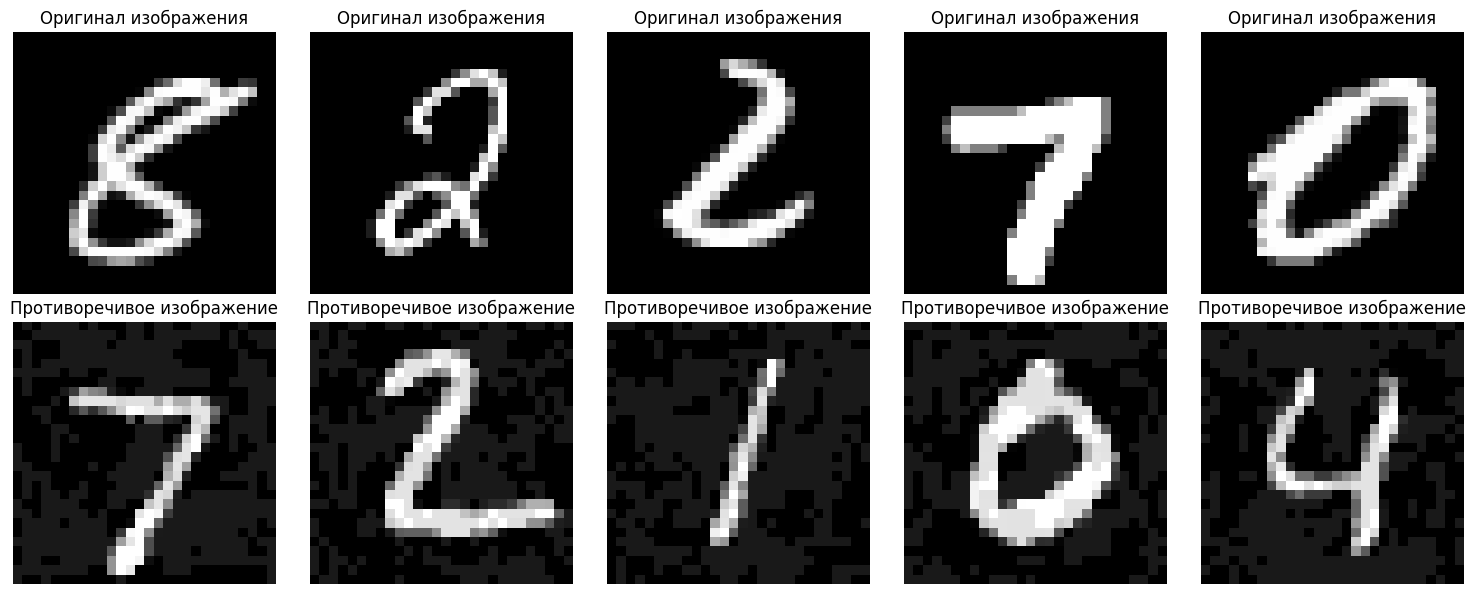

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Указываем количество изображений для отображения
num_images = 5

# Выбираем случайные индексы из тестового набора
random_indices = np.random.choice(len(test_images), num_images, replace=False)

# Создаем фигуру для отображения изображений
plt.figure(figsize=(15, 6))

for i, idx in enumerate(random_indices):
    # Отображаем оригинальное изображение
    plt.subplot(2, num_images, i + 1)
    plt.title("Оригинал изображения")
    plt.imshow(test_images[idx], cmap="gray")
    plt.axis('off')

    # Отображаем противоречивое изображение
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.title("Противоречивое изображение")
    plt.imshow(adversarial_example[i].reshape(28, 28), cmap="gray")  # Используем i вместо idx для доступа к adversarial_example
    plt.axis('off')

# Настраиваем компоновку и отображаем график
plt.tight_layout()
plt.show()

###**Шаг 7: Оценка противоречивых примеров на обеих моделях**

In [28]:
# Оценим полносвязную модель на противоречивых примерах
adversarial_loss1, adversarial_acc1 = model1.evaluate(
    adversarial_example.reshape(-1, 28, 28),  # Изменяем форму массива для соответствия входу модели
    test_labels
)

# Оценим свёрточную модель на противоречивых примерах
adversarial_loss2, adversarial_acc2 = model2.evaluate(
    adversarial_example.reshape(-1, 28, 28, 1),  # Добавляем размерность канала для свёрточной модели
    test_labels
)

# Выводим результаты оценки
print(f'Точность полносвязной модели: {adversarial_acc1:.4f}')
print(f'Точность свёрточной модели: {adversarial_acc2:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1044 - loss: 6.6395
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9505 - loss: 0.1628
Точность полносвязной модели: 0.1368
Точность свёрточной модели: 0.9574


Оба значения указывают на то, что полносвязная модель имеет низкую точность при классификации противоречивых изображений, созданных с помощью атаки FGSM.
Низкая точность (9.71% и 13.68%) свидетельствует о высокой уязвимости модели к адверсариальным атакам.

Полносвязные модели, как правило, менее устойчивы к небольшим изменениям входных данных. Это может быть связано с их архитектурой, которая не учитывает пространственные зависимости между пикселями изображений так эффективно, как свёрточные сети.

###**Шаг 8: Перейдем к реализации атаки FGSM на свёрточную модель**

In [29]:
# Создаём противоречивые изображения для свёрточной модели:
adversarial_example1 = generate_adversarial_example(model2, test_images, test_labels, epsilon)

###**Шаг 9: Визуализация результатов проведенной атаки на свёрточную модель:**

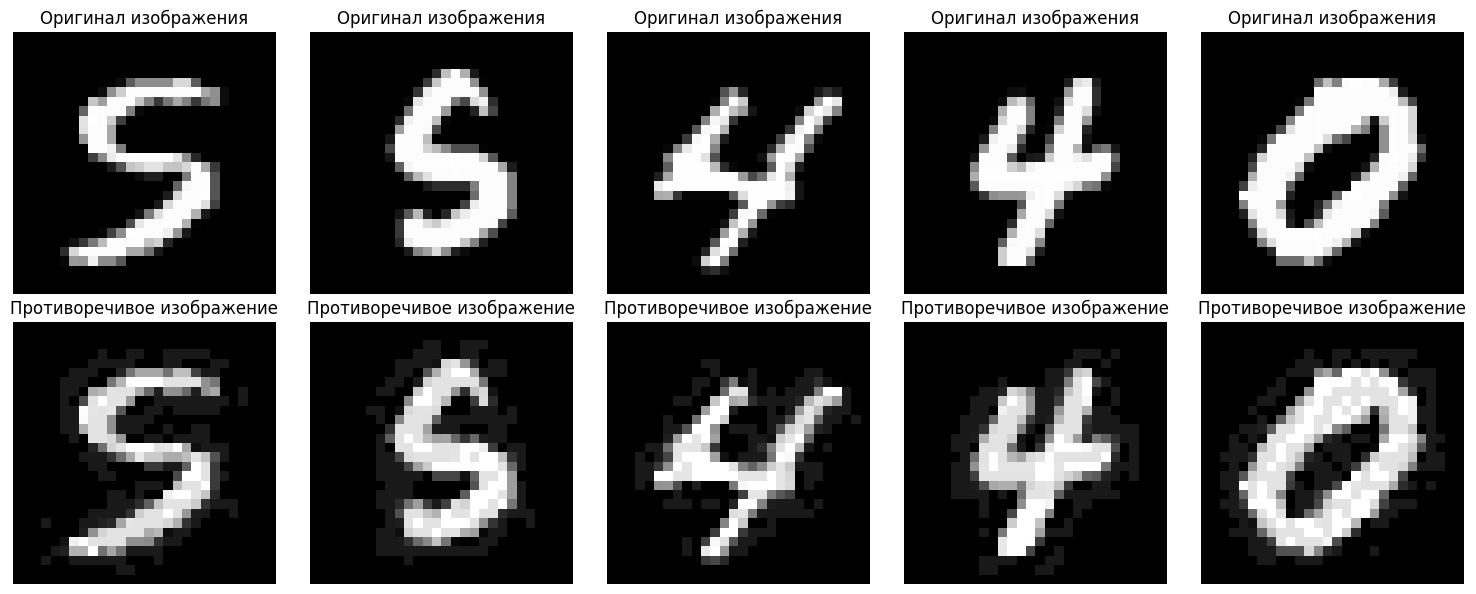

In [30]:
# Указываем количество изображений для отображения:
num_images = 5
# ВЫбираем случайные индексы:
random_indices = np.random.choice(len(test_images), num_images, replace=False)

# Создаём фигуры:
plt.figure(figsize=(15, 6))


for i, idx in enumerate(random_indices):
    plt.subplot(2, num_images, i + 1)
    plt.title("Оригинал изображения")
    plt.imshow(test_images[idx], cmap="gray")
    plt.axis('off')

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.title("Противоречивое изображение")
    plt.imshow(adversarial_example1[idx].reshape(28, 28), cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()

###**Шаг 10: Оценка противоречивых примеров на обеих моделях**

In [33]:
# Оценим полносвязную модель на противоречивых примерах
adversarial_loss1, adversarial_acc1 = model1.evaluate(
    adversarial_example.reshape(-1, 28, 28),  # Для полносвязной модели
    test_labels
)

# Оценим свёрточную модель на противоречивых примерах
adversarial_loss2, adversarial_acc2 = model2.evaluate(
    adversarial_example.reshape(-1, 28, 28, 1),  # Добавляем размерность канала для свёрточной модели
    test_labels
)

# Выводим результаты оценки
print(f'Точность полносвязной модели: {adversarial_acc1:.4f}')
print(f'Точность свёрточной модели: {adversarial_acc2:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1044 - loss: 6.6395
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9505 - loss: 0.1628
Точность полносвязной модели: 0.1368
Точность свёрточной модели: 0.9574


Точность полносвязной модели: 0.1368 (или 13.68%)
Это значение указывает на то, что полносвязная модель смогла правильно классифицировать только около 13.68% противоречивых изображений, созданных с помощью атаки FGSM.
Хотя это значение выше, чем в предыдущем тесте (где точность была 9.71%), оно все еще указывает на высокую уязвимость модели к адверсариальным атакам. Полносвязные модели, как правило, менее устойчивы к небольшим изменениям в входных данных из-за их архитектуры и способа обработки информации.
Точность свёрточной модели: 0.9574 (или 95.74%)
Свёрточная модель показала значительно более высокую точность в 95.74%. Это означает, что она смогла правильно классифицировать почти все противоречивые изображения.
Высокая точность свёрточной модели подтверждает её устойчивость к атакам типа FGSM. Свёрточные нейронные сети (CNN) лучше справляются с изменениями в изображениях благодаря своей способности выделять пространственные признаки и учитывать локальные зависимости.